In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds

import pandas as pd
import numpy as np
from PIL import Image
import shutil
import random
import os
import numpy as np
import json



import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/MyDrive/Machine_Learning_stuff/celebs/

HUNDRED_TRAIN='./hundred_imgs_train'

Mounted at /content/gdrive
/content/gdrive/MyDrive/Machine_Learning_stuff/celebs


In [ ]:
# #load features present dataset into a pandas dataframe

desc_df = pd.read_csv('./Anno/list_attr_celeba.txt',sep='\n',header=None)#pd.read_table('./Anno/list_attr_celeba.txt')
    
desc_df.head(10)

,0
0,name 5_o_Clock_Shadow Arched_Eyebrows Attracti...
1,000001.jpg -1 1 1 -1 -1 -1 -1 -1 -1 -1 -1 1...
2,000002.jpg -1 -1 -1 1 -1 -1 -1 1 -1 -1 -1 1...
3,000003.jpg -1 -1 -1 -1 -1 -1 1 -1 -1 -1 1 -1...
4,000004.jpg -1 -1 1 -1 -1 -1 -1 -1 -1 -1 -1 -1...
5,000005.jpg -1 1 1 -1 -1 -1 1 -1 -1 -1 -1 -1...
6,000006.jpg -1 1 1 -1 -1 -1 1 -1 -1 -1 -1 1...
7,000007.jpg 1 -1 1 1 -1 -1 1 1 1 -1 -1 -1 ...
8,000008.jpg 1 1 -1 1 -1 -1 1 -1 1 -1 -1 -1 ...
9,000009.jpg -1 1 1 -1 -1 1 1 -1 -1 -1 -1 -1...


In [ ]:
#We now need to split the above dataframe by spaces and then make the first row the 'index row'
desc_df_split=desc_df[0].str.split(expand=True)
desc_df_split=desc_df_split.rename(columns=desc_df_split.iloc[0])
desc_df_split.drop(index=desc_df_split.index[0],axis=0,inplace=True)
#desc_df_split_hundred=desc_df_split.head(100)

desc_df_split.to_csv('./edited_anno/edited_all_features.csv')

In [ ]:
loc_df = pd.read_csv('./Anno/list_landmarks_align_celeba.txt',sep='\n',header=None)

loc_df_split=loc_df[0].str.split(expand=True)
loc_df_split=loc_df_split.rename(columns=loc_df_split.iloc[0])
loc_df_split.drop(index=loc_df_split.index[0],axis=0,inplace=True)
#loc_df_split_hundred=loc_df_split.head(100)
loc_df_split.to_csv('./edited_anno/edited_all_landmarks.csv')

In [2]:
def filenames_in_order(start,list_length):
  return [(6-len(str(i)))*'0' + str(i) + '.jpg' for i in range(start,start +list_length)]

In [5]:
LANDMARKS_CSV_PATH='./edited_anno/hundred_landmarks.csv'

hundred_landmarks=pd.read_csv('./edited_anno/hundred_landmarks.csv')



print(hundred_landmarks['lefteye_x'][0])
      
hundred_landmarks.head(100)





69


,Unnamed: 0,name,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,1,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,2,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,3,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,4,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,5,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,000096.jpg,69,111,108,112,91,128,74,151,103,152
96,97,000097.jpg,69,111,108,111,87,132,76,150,101,154
97,98,000098.jpg,70,111,107,111,80,137,77,152,100,154
98,99,000099.jpg,68,112,109,112,90,138,66,151,111,150


In [4]:
keys=["lefteye_x","lefteye_y","righteye_x","righteye_y", "nose_x", "nose_y", "leftmouth_x", "leftmouth_y", "rightmouth_x", "rightmouth_y"]
def get_coords(df,keys,row):
  features_list_x=[]
  features_list_y=[]
  assert len(keys)%2==0
  
  for i in range(0,len(keys)-1,2):
    #print(i)
    #print(keys[i])
    features_list_x.append(df[keys[i]][row])
    features_list_y.append(df[keys[i+1]][row])

  
  return features_list_x,features_list_y

f_list_x,f_list_y=get_coords(hundred_landmarks,keys,0)




NameError: ignored

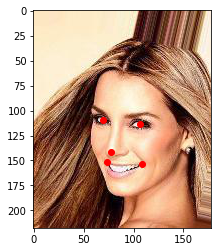

In [ ]:
img=plt.imread(os.path.join(HUNDRED_TRAIN,'000001.jpg'))
plt.imshow(img)
plt.scatter(f_list_x,f_list_y,color='r')

In [ ]:
def loadImages(path,file_order):
    # return array of images

    #imagesList = os.listdir(path)
    #print(imagesList[38])
    #print(new_img_list)
    
    loadedImages = []
    for image in file_order:      
        img = Image.open(os.path.join(path,image))
        loadedImages.append(img)

    return loadedImages



# images in an array
imgs = loadImages(HUNDRED_TRAIN,filenames_in_order(1,100))

# def image_grid_with_landmarks(imgs, rows, cols):
#     assert len(imgs) == rows*cols

#     w, h = imgs[0].size
#     grid = Image.new('RGB', size=(cols*w, rows*h))
#     grid_w, grid_h = grid.size
    
#     for i, img in enumerate(imgs):
#         grid.paste(img, box=(i%cols*w, i//cols*h))
#     return grid

# grid = image_grid(imgs, rows=10, cols=10)

# #Display grid image inline

# plt.figure(figsize=(40,40))
# plt.imshow(np.asarray(grid))


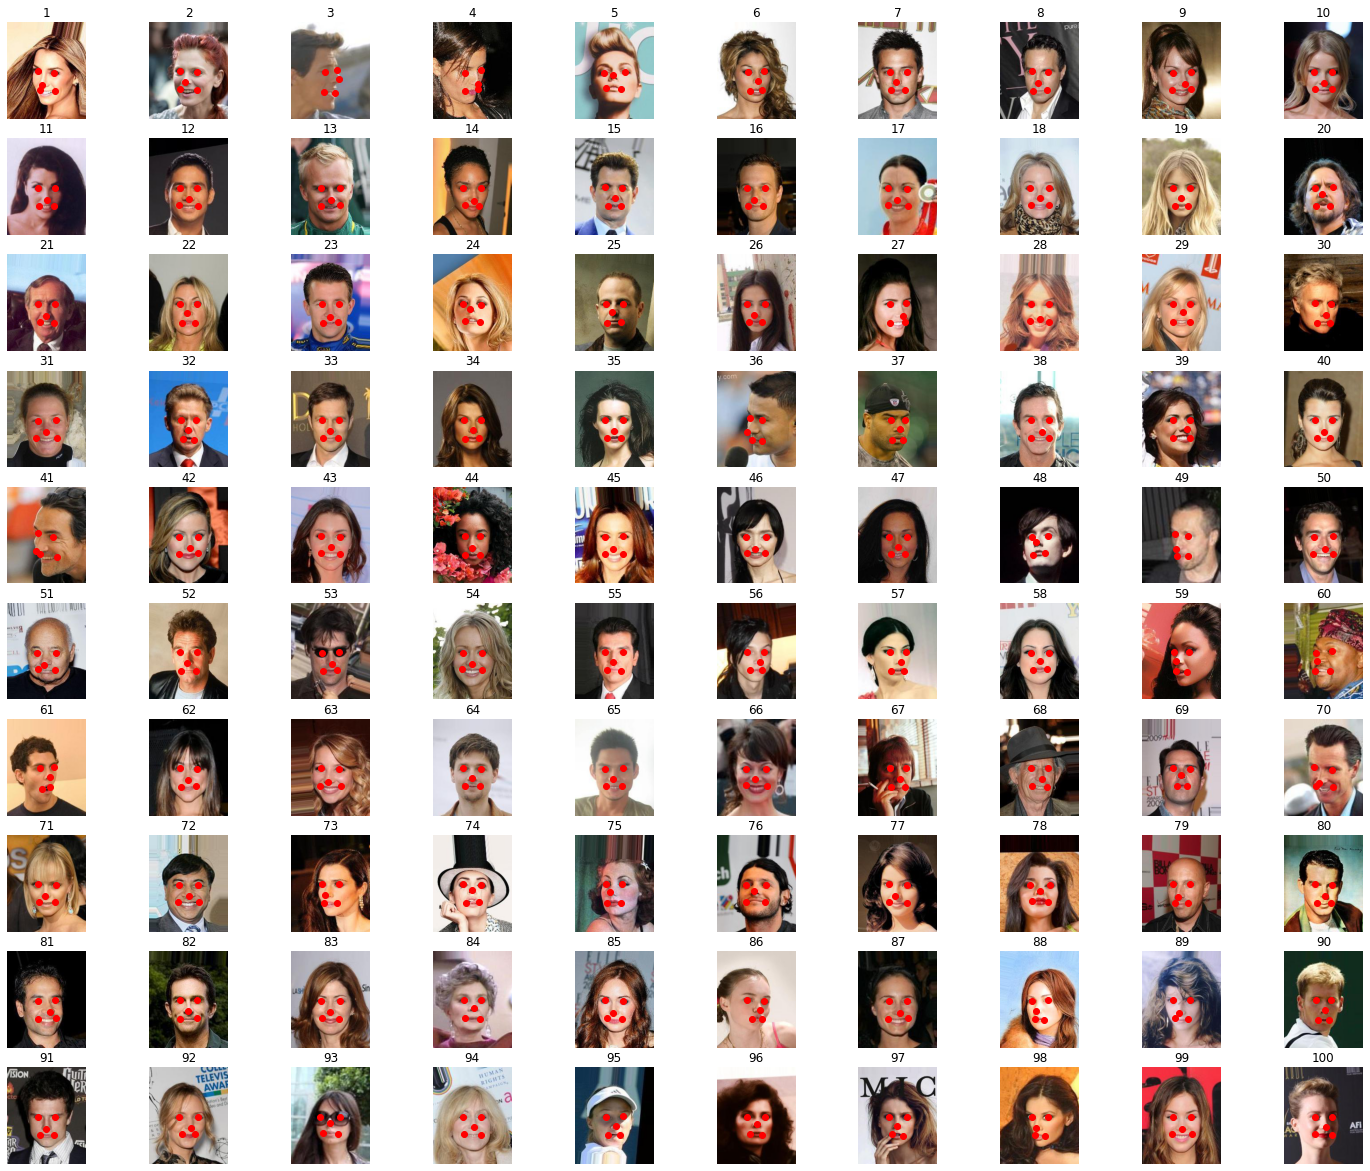

In [ ]:
fig = plt.figure(figsize=(25, 21))
rows=10
columns=10
for (index,img) in enumerate(imgs):

  fig.add_subplot(rows, columns, index+1)
  plt.imshow(img)
  f_list_x,f_list_y=get_coords(hundred_landmarks,keys,index)
  plt.scatter(f_list_x,f_list_y,color='r')
  plt.axis('off')
  plt.title(str(index+1))
  



# Get training set ready

In [ ]:
#First we need to get rid of people with sunglasses in our dataset the line of code below achieves this:

#get feature df

hundred_features_df=pd.read_csv('./edited_anno/hundred_features.csv')


hundred_sunglasses_list=[hundred_features_df['name'].iloc[el] for el in range(len(hundred_features_df.index)) if hundred_features_df['Eyeglasses'].iloc[el]==1]

hundred_sunglasses_list


#Store a list which ones have been removed using json

# with open('./misc/hundred_sunglasses.txt', 'w') as f:
#     f.write(json.dumps(hundred_sunglasses_list))





In [46]:
#Delete images from hundred dataset

print(len(os.listdir(HUNDRED_TRAIN)))

for filename in hundred_sunglasses_list:
  os.remove(os.path.join(HUNDRED_TRAIN,filename))

print(len(os.listdir(HUNDRED_TRAIN)))

98


FileNotFoundError: ignored

In [3]:
def get_index_from_img(img_name):
  return int(img_name[:-4])-1


In [9]:
def landmarks_gen(path,df):

  for img_name in os.listdir(path):

    img=Image.open(os.path.join(path,img_name))

    row_index=get_index_from_img(img_name)

   
    landmark_list= df[keys].iloc[row_index].tolist()

    landmark_list= tf.convert_to_tensor(landmark_list, dtype=tf.float32)

    yield (img,landmark_list)



data1 = tf.data.Dataset.from_generator(landmarks_gen,output_types= args = ([HUNDRED_TRAIN,hundred_landmarks]) )
  

TypeError: ignored

In [49]:
file_str='000100.jpg'
file_str=file_str[:-4]
print(int(file_str))

100


In [56]:
hundred_landmarks[keys].iloc[0].tolist()

[69, 109, 106, 113, 77, 142, 73, 152, 108, 154]